# Plot the data

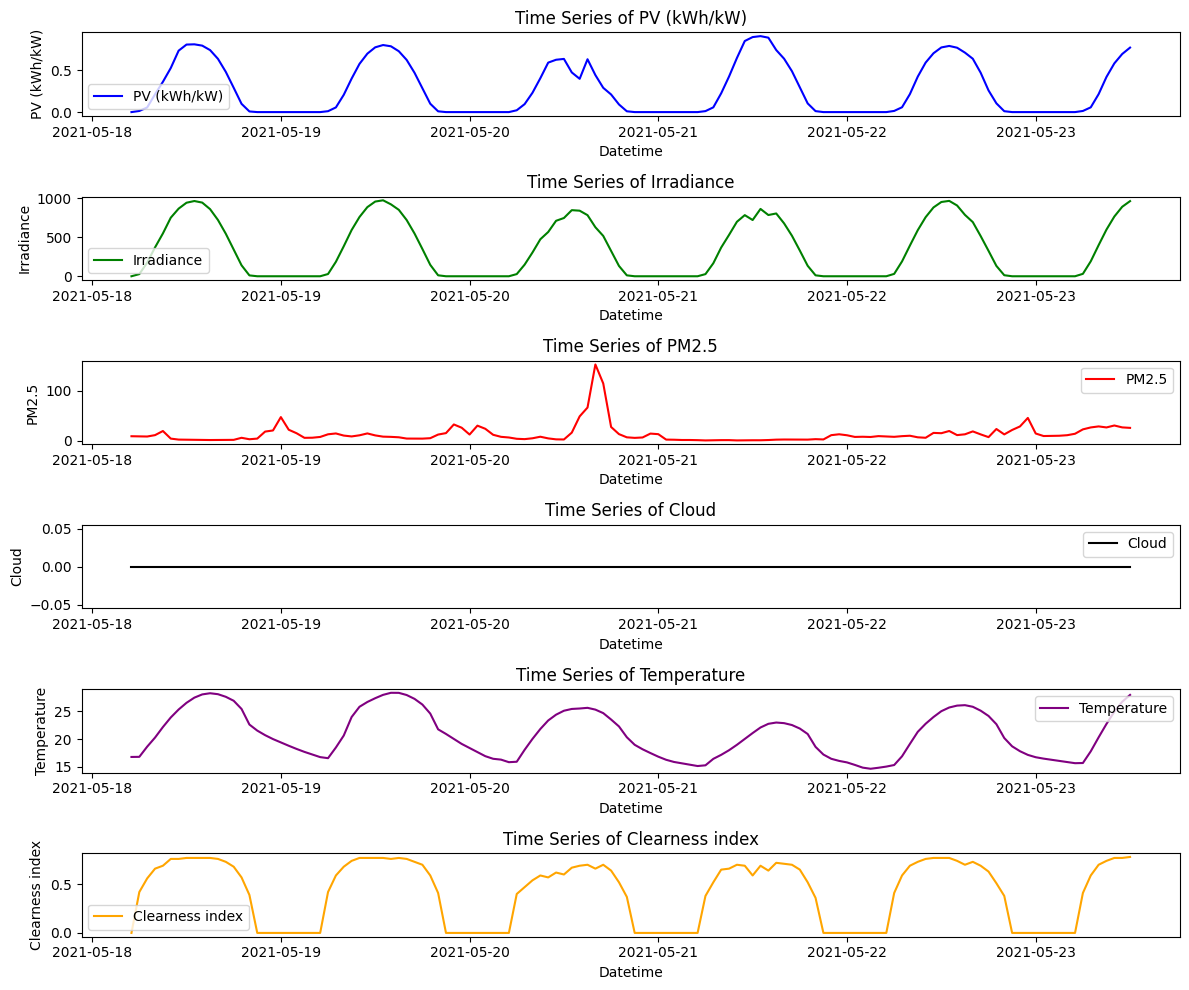

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Change the PV file here
file_name = 'QWERTY.csv'  # Replace with your file name
pv = 'PV (kWh/kW)'
irr = 'Irradiance'
pm25 = 'PM2.5'
cloud = 'Cloud'
temp = 'Temperature'
KT = 'Clearness index'
# Define your start and end dates for the regression analysis
start_date = '2021-05-18'  # Replace with your start date
end_date = '2021-05-24'    # Replace with your end date

# Load the dataset and drop rows with missing values
df = pd.read_csv(file_name).dropna(axis=0)

# Convert 'Datetime' column to datetime type and set it as index
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

# Plotting all time series in one figure
plt.figure(figsize=(12, 10))

# Helper function to create a subplot for a variable
def plot_time_series(index, series, label, color):
    plt.subplot(6, 1, index)
    plt.plot(series, label=label, color=color)  # Plot the series directly
    plt.xlabel("Datetime")
    plt.ylabel(label)
    plt.title(f"Time Series of {label}")
    plt.legend()

# Plot each time series
plot_time_series(1, df[pv], pv, "blue")
plot_time_series(2, df[irr], irr, "green")
plot_time_series(3, df[pm25], pm25, "red")
plot_time_series(4, df[cloud], cloud, "black")
plot_time_series(5, df[temp], temp, "purple")
plot_time_series(6, df[KT], KT, "orange")  # Plot KT series

plt.tight_layout()
plt.show()



# Linear Regression

In [175]:
# Continue with the regression analysis

# Filter the dataframe for regression analysis
df = df[(df.index >= start_date) & (df.index <= end_date)]

# Drop rows where the 'PV' column has zero values
df = df[df[pv] != 0]

# Separate the target variable (PV INPUT) and features
X = df.drop(columns=[pv,cloud,irr])  # Dropping additional columns as needed

y = df[pv]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the linear regression model
model = LinearRegression().fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error (MSE) and R-squared metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.038148962127540764
R-squared: 0.5974666326542566


In [176]:
# Displaying the trained model weights
weights = pd.DataFrame({"Feature": X.columns, "Weight": model.coef_})
print("Intercept:", model.intercept_)
print(weights)

Intercept: 0.42814769230769234
           Feature    Weight
0            PM2.5 -0.041047
1      Temperature  0.086663
2  Clearness index  0.172253


# Cross Validation

In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define the k-fold cross-validation method
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the linear regression
lin = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(LinearRegression(), X, y, cv=kfold, scoring='r2')

# Output the cross-validation scores
print(f'Cross-validation R-squared scores: {cv_scores}')
print(f'Average R-squared: {cv_scores.mean()}')

# Train the model on the entire dataset to get the coefficients
lin.fit(X, y)

# Retrieve the linear regression model from the pipeline
#model = lin.named_steps['linearregression']

# Displaying the trained model weights
weights = pd.DataFrame({"Feature": X.columns, "Weight": model.coef_})
print("Intercept:", lin.intercept_)
print(weights)

Cross-validation R-squared scores: [0.59746663 0.36043686 0.73791246 0.47346687 0.64800432]
Average R-squared: 0.5634574281602756
Intercept: -0.9514313599359143
           Feature    Weight
0            PM2.5 -0.041047
1      Temperature  0.086663
2  Clearness index  0.172253
